In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

In [7]:
[train.shape, test.shape]

[(891, 12), (418, 11)]

In [8]:
print('Number of Training = {}'.format(train.shape[0]))
print('Number of Test = {}\n'.format(test.shape[0]))

Number of Training = 891
Number of Test = 418



In [9]:
#import pandas_profiling as pp

In [10]:
import seaborn as sns

In [11]:
#report = pp.ProfileReport(train)
#display(report)


Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancÃ©s were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

In [12]:
#report.to_file(output_file = 'titanic_report.html')

taking care of missing values

In [13]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


how many survived

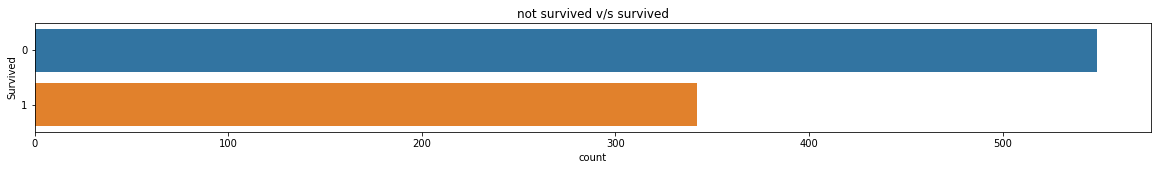

In [15]:
plt.figure(figsize =(20,2))
sns.countplot(y = 'Survived', data = train)
plt.title('not survived v/s survived')
plt.show()

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

Text(0.5, 0, 'count')

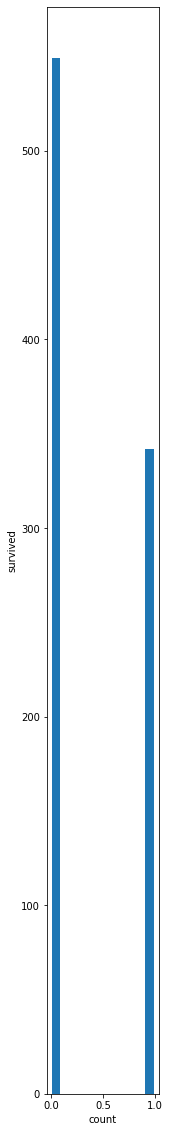

In [17]:
matplotlib.rcParams['figure.figsize'] = (2,10)
plt.hist(train.Survived, rwidth = 0.8)
plt.ylabel("survived")
plt.xlabel("count")

droping name feature as it has so many distinct values and is not important for pridicting final output

In [18]:
train.drop('Name', axis = 1, inplace = True)
test.drop("Name", axis = 1, inplace =True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
[train.shape, test.shape]

[(891, 11), (418, 10)]

In [36]:
#age v/s survival
plt.figure(figsize = (20,5))
sns.boxplot(x = "Survived", y = 'Age', data = train)

ValueError: Could not interpret input 'Age'

<Figure size 1440x360 with 0 Axes>

In [22]:
# droping age feature due to so many missing values
train.drop('Age', axis = 1, inplace = True)
test.drop("Age", axis = 1, inplace =True)
[train.shape, test.shape]

[(891, 10), (418, 9)]

In [23]:
train.drop('Ticket', axis = 1, inplace = True)
test.drop("Ticket", axis = 1, inplace =True)

train.drop('Cabin', axis = 1, inplace = True)
test.drop("Cabin", axis = 1, inplace =True)
[train.shape, test.shape]

[(891, 8), (418, 7)]

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


embark have 2 missing  vslues 
so either fill them with s(coz thats the most common, highest frequency thing) or drop this two rows

<AxesSubplot:xlabel='count', ylabel='Embarked'>

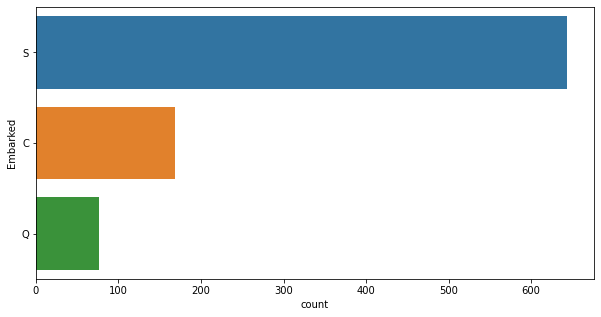

In [25]:
plt.figure(figsize = (10,5))
sns.countplot(y = 'Embarked', data = train)

In [26]:
train = train.dropna(subset = ["Embarked"])
# train = train.fillna({"Embarked" = "S"})
train.shape

(889, 8)

changing sex feature into numerical value

<AxesSubplot:xlabel='count', ylabel='Sex'>

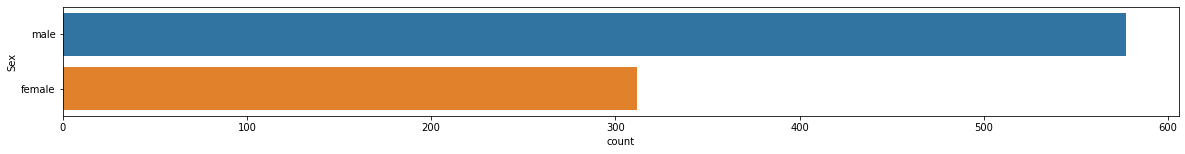

In [27]:
plt.figure(figsize = (20,2))
sns.countplot(y = 'Sex', data = train)

In [28]:
train["Sex"] = np.where(train['Sex'] == 'female',1,0)
test["Sex"] = np.where(test['Sex'] == 'female',1,0)

In [29]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1,0,7.2500,S
1,2,1,1,1,1,0,71.2833,C
2,3,1,3,1,0,0,7.9250,S
3,4,1,1,1,1,0,53.1000,S
4,5,0,3,0,0,0,8.0500,S
5,6,0,3,0,0,0,8.4583,Q
6,7,0,1,0,0,0,51.8625,S
7,8,0,3,0,3,1,21.0750,S
8,9,1,3,1,0,2,11.1333,S
9,10,1,2,1,1,0,30.0708,C


### encoding categorical data

In [30]:
embarked_oh = pd.get_dummies(train["Embarked"], prefix= 'embarked')
sex_oh = pd.get_dummies(train["Sex"], prefix= 'sex')
pclass_oh = pd.get_dummies(train["Pclass"], prefix= 'pclass')

In [31]:
#adding encoded feature to training dataset
df = pd.concat([train, embarked_oh, sex_oh, pclass_oh], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,3,0,1,0,7.2500,S,0,0,1,1,0,0,0,1
1,2,1,1,1,1,0,71.2833,C,1,0,0,0,1,1,0,0
2,3,1,3,1,0,0,7.9250,S,0,0,1,0,1,0,0,1
3,4,1,1,1,1,0,53.1000,S,0,0,1,0,1,1,0,0
4,5,0,3,0,0,0,8.0500,S,0,0,1,1,0,0,0,1


In [32]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)

In [33]:
df.head()

,PassengerId,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,1,0,7.2500,0,0,1,1,0,0,0,1
1,2,1,1,0,71.2833,1,0,0,0,1,1,0,0
2,3,1,0,0,7.9250,0,0,1,0,1,0,0,1
3,4,1,1,0,53.1000,0,0,1,0,1,1,0,0
4,5,0,0,0,8.0500,0,0,1,1,0,0,0,1


### doing same thing on test dataset

In [34]:
embarked_oh_2 = pd.get_dummies(test["Embarked"], prefix= 'embarked')
sex_oh_2 = pd.get_dummies(test["Sex"], prefix= 'sex')
pclass_oh_2 = pd.get_dummies(test["Pclass"], prefix= 'pclass')

df2 = pd.concat([test, embarked_oh_2, sex_oh_2, pclass_oh_2], axis = 1)

df2 = df2.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)
df2.head()

,PassengerId,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,892,0,0,7.8292,0,1,0,1,0,0,0,1
1,893,1,0,7.0000,0,0,1,0,1,0,0,1
2,894,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,0,0,8.6625,0,0,1,1,0,0,0,1
4,896,1,1,12.2875,0,0,1,0,1,0,0,1


In [35]:
[df.shape, df2.shape]

[(889, 13), (418, 12)]